In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st
from streamlit_dynamic_filters import DynamicFilters

ModuleNotFoundError: No module named 'streamlit_dynamic_filters'

In [106]:
! pip install streamlit



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
with open('financebill_data.txt') as f:
    lines = [line.rstrip('\n') for line in f]

In [84]:
test_votes = lines

In [85]:
def create_dataframe():
    all_votes = []
    for i in test_votes:
        split_names = (i.split(","))
        party_and_vote = split_names[-1].split("-")
        split_names.pop()
        split_names.extend(party_and_vote)
        all_votes.append(split_names)
        all_votes = [[item.strip() for item in split_names] for split_names in all_votes]

        
    columns = ['Surname', 'Othernames', 'Constituency', 'Party', 'Vote']
    df = pd.DataFrame(all_votes, columns=columns)
    return df


In [86]:
df = create_dataframe()
df

,Surname,Othernames,Constituency,Party,Vote
0,Adagala,Beatrice Kahai,VIHIGA COUNTY,ANC,YES
1,Denar,Joseph Hamisi,NOMINATED,ANC,YES
2,Gimose,Charles Gumini,HAMISI,ANC,ABSENT
3,Ikana,Fredrick Lusuli,SHINYALU,ANC,YES
4,Injendi,Moses Malulu,MALAVA,ANC,YES
...,...,...,...,...,...
344,Nyenze,Edith Vethi,KITUI WEST,WIPER,NO
345,Nzambia,Thudeeus Kithua,KILOME,WIPER,NO
346,Nzengu,Paul Musyimi,MWINGI NORTH,WIPER,ABSENT
347,Nzioka,Erastus Kivasu,MBOONI,WIPER,NO


In [87]:
df[df['Vote']=='UDA']

,Surname,Othernames,Constituency,Party,Vote


In [88]:
df['Vote'].value_counts()

YES          173
ABSENT        83
NO            77
SUSPENDED      6
Name: Vote, dtype: int64

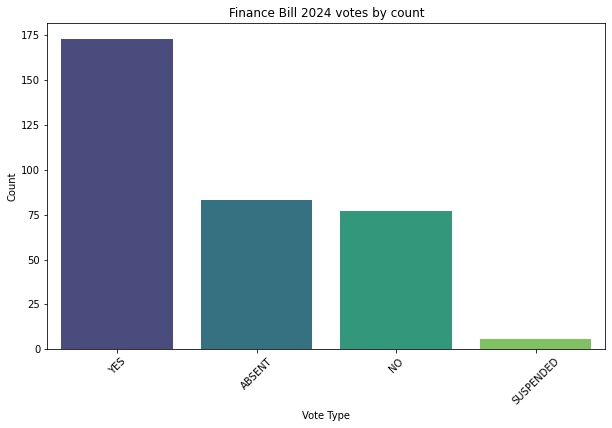

In [117]:
normalized_counts = df['Vote'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_counts.index, y=normalized_counts.values, palette="viridis")
plt.title('Finance Bill 2024 votes by count')
plt.xlabel('Vote Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# # Plot pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(normalized_counts, labels=normalized_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
# plt.title('Normalized Vote Distribution')
# plt.show()

In [115]:
!pip uninstall pandas
!pip install pandas==1.1.5

^C
   ---------------------------------------- 9.0/9.0 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
df.to_csv('financebillvotes.csv', index=False)


In [4]:
!pip install --upgrade pip



ERROR: To modify pip, please run the following command:
c:\users\libellule\anaconda3\envs\learn-env\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 2.1/2.1 MB 1.3 MB/s eta 0:00:00


In [2]:
import streamlit as st
import pandas as pd

# Load your DataFrame
df = pd.read_csv('financebillvotes.csv')

# Sidebar for user input
column = st.sidebar.selectbox('Select column', df.columns)
value = st.sidebar.text_input('Enter value')

# Filter DataFrame based on input
filtered_df = df[df[column].astype(str).str.contains(value, na=False)]

# Display the filtered DataFrame
st.dataframe(filtered_df)



2024-06-13 17:54:21.385 
  command:

    streamlit run c:\Users\Libellule\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()